In [1]:
import numpy as np
import pandas as pd

In [106]:
hip = pd.read_csv('hip_cmv_n_k.csv', names=['patient', 'status', 'n', 'k'])
hip

,patient,status,n,k
0,HIP00110,0.0,130940,0
1,HIP00169,0.0,115919,1
2,HIP00594,1.0,198830,10
3,HIP00602,0.0,248959,0
4,HIP00614,0.0,128274,1
...,...,...,...,...
661,HIP17887,NaN,233512,4
662,HIP19048,0.0,67186,0
663,HIP19089,NaN,76837,5
664,HIP19716,NaN,127221,0


In [6]:
from matplotlib import pyplot as plt

In [62]:
def plot_dataset(df):
    for s,c,l in ((0,'blue','CMV-'), (1,'red','CMV+')):
        rows = df[df.status == s]
        plt.scatter(rows.n, rows.k, c = c, label = l, alpha = 0.2, edgecolors = 'none')
    plt.title('Total TCRs vs. CMV-Associated TCRs')
    plt.xlabel('n'); plt.ylabel('k')
    plt.legend()
    plt.show()

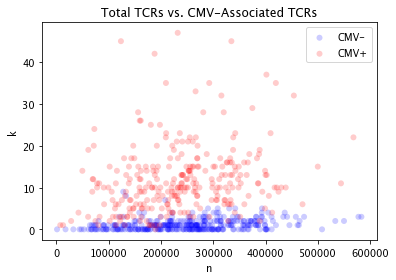

In [63]:
plot_dataset(hip)

In [171]:
# only train for patients w/ known status
hip_known = hip[hip.status.notna()]
X = hip_known[['n','k']]
y = hip_known.status

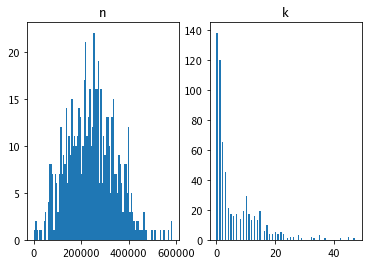

In [41]:
plt.subplot(121)
plt.hist(hip_known.n, 100)
plt.title('n')
plt.subplot(122)
plt.hist(hip_known.k, 100)
plt.title('k')
plt.show()

In [42]:
from sklearn.naive_bayes import GaussianNB

In [43]:
gnb = GaussianNB()
gnb.fit(X, y)

GaussianNB()

In [105]:
keck = pd.read_csv('keck_cmv_n_k.csv', names=['patient', 'status', 'n', 'k'])
keck

,patient,status,n,k
0,Keck0001_MC1,1,131030,1
1,Keck0002_MC1,0,112895,0
2,Keck0003_MC1,0,233505,2
3,Keck0004_MC1,1,152898,13
4,Keck0005_MC1,0,173862,1
...,...,...,...,...
115,Keck0116_MC1,0,438842,2
116,Keck0117_MC1,1,331272,11
117,Keck0118_MC1,1,397497,22
118,Keck0119_MC1,1,421166,12


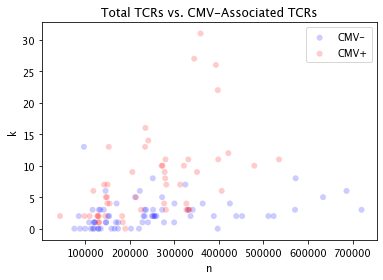

In [64]:
plot_dataset(keck)

In [48]:
gnb.score(keck[['n','k']], keck.status)

0.7583333333333333

In [54]:
# mispredictions
keck[gnb.predict(keck[['n','k']]) != keck.status]

,patient,status,n,k
0,Keck0001_MC1,1,131030,1
6,Keck0007_MC1,1,118242,6
8,Keck0009_MC1,1,154804,4
14,Keck0015_MC1,1,146083,5
17,Keck0018_MC1,1,128571,2
22,Keck0023_MC1,1,130401,2
25,Keck0026_MC1,1,98398,2
29,Keck0030_MC1,1,145084,2
34,Keck0035_MC1,1,127026,2
39,Keck0040_MC1,1,189838,0


In [108]:
paper_inferred = pd.read_csv('all_inferred.csv', names=['patient', 'status'])
paper_inferred

,patient,status
0,HIP00110,0.0
1,HIP00169,0.0
2,HIP00594,1.0
3,HIP00602,0.0
4,HIP00614,0.0
...,...,...
781,Keck0116_MC1,0.0
782,Keck0117_MC1,1.0
783,Keck0118_MC1,1.0
784,Keck0119_MC1,1.0


In [164]:
paper_inferred_hip = paper_inferred[paper_inferred.patient.str.startswith('HIP')]
paper_inferred_hip_known = paper_inferred_hip[paper_inferred_hip.status.notna()]
paper_inferred_keck = paper_inferred[paper_inferred.patient.str.startswith('Keck')].reset_index()
paper_inferred_hip_known, paper_inferred_keck

(      patient  status
 0    HIP00110     0.0
 1    HIP00169     0.0
 2    HIP00594     1.0
 3    HIP00602     0.0
 4    HIP00614     0.0
 ..        ...     ...
 657  HIP17760     1.0
 659  HIP17837     1.0
 660  HIP17845     1.0
 662  HIP19048     0.0
 665  HIP19717     1.0
 
 [641 rows x 2 columns],      index       patient  status
 0      666  Keck0001_MC1     0.0
 1      667  Keck0002_MC1     0.0
 2      668  Keck0003_MC1     0.0
 3      669  Keck0004_MC1     1.0
 4      670  Keck0005_MC1     0.0
 ..     ...           ...     ...
 115    781  Keck0116_MC1     0.0
 116    782  Keck0117_MC1     1.0
 117    783  Keck0118_MC1     1.0
 118    784  Keck0119_MC1     1.0
 119    785  Keck0120_MC1     0.0
 
 [120 rows x 3 columns])

In [165]:
assert (paper_inferred_hip_known.patient == hip_known.patient).all() # line up
assert (paper_inferred_keck.patient == keck.patient).all() # line up

In [177]:
for inferred, _X, _y in ((paper_inferred_hip_known, X, y), (paper_inferred_keck, keck[['n','k']], keck.status)):
    # things I get right and they don't
    print('got right instead:', ((gnb.predict(_X) != inferred.status) & (gnb.predict(_X) == _y)).sum())
    # things I get wrong and they don't
    print('got wrong instead:', ((gnb.predict(_X) != inferred.status) & (gnb.predict(_X) != _y)).sum())
    print()

got right instead: 6
got wrong instead: 57

got right instead: 5
got wrong instead: 21

